In [5]:
import numpy as np
from numpy.core.numeric import True_
import time
import matplotlib.pyplot as plt
import sys
import math
import pickle

import sys
sys.path.insert(0,'..')
import get_cup_dataset as dt
from SVR import SVR

In [6]:
def plot_svr_predict(svr, x, y, pred, text="fig_title"):
    fig,axs = plt.subplots(2,5, figsize=(15,15))
    for i in range(x.shape[1]):
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],y,color="red",marker='x')
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],pred,color="blue",marker='.')
    fig.suptitle(text)
    plt.show()

In [7]:
start = time.time()
first_dim = True
data, data_out = dt._get_cup('train')
data_out = data_out[:, 0]
maxiter = 250000
max_error_target_func_value = 1e-4
target_func_value = -3924.177658337275  # -3931.993812701131

Training first model ... 


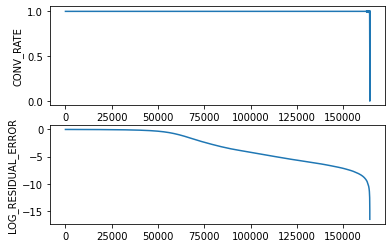

Fit time: 7472.605273962021, #SV: 1509
DEVSET MEE: 3.5387889388809946


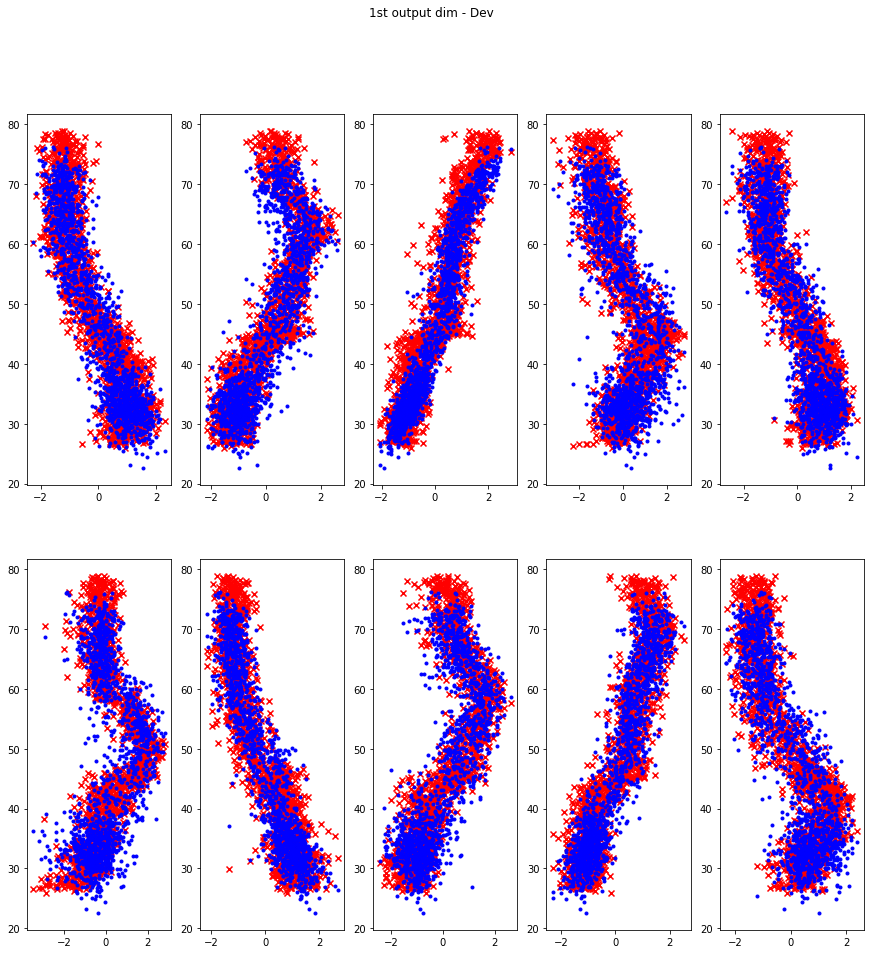

In [8]:
cup_model = SVR('linear', box=1, eps=1)
print("Training first model ... ")
opt_argv = {'alpha': 0.7, 'psi': 0.15, 'eps': 0.1, 'rho': 0.6, 'deltares': 0.00001, 'maxiter': maxiter}  # 15
cup_model.fit(data, data_out, optim_args=opt_argv, optim_verbose=False, convergence_verbose=True, max_error_target_func_value = max_error_target_func_value, target_func_value = target_func_value)
pred_1 = [float(cup_model.predict(data[i])) for i in range(data.shape[0])]
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((data_out[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, data, data_out, pred_1, text='1st output dim - Dev')

In [9]:
cup_model.history['fstar'], cup_model.status

(-3923.7853296621324, 'acceptable')

In [10]:
len(cup_model.history['f'])

164375

In [11]:
import os
save_path = "../gs_models/gs_linear_15_2"
with open(save_path, "wb") as f:
    pickle.dump({"model": cup_model}, f, protocol=pickle.HIGHEST_PROTOCOL)
    print(f"GridSearch output succesfully saved to {save_path}")

GridSearch output succesfully saved to ../gs_models/gs_linear_15_2
